In [8]:
import gzip
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def _read32(bytestream):
  dt = np.dtype(np.uint32).newbyteorder('>')
  return np.frombuffer(bytestream.read(4), dtype=dt)[0]

def extract_images(f):
    print('Extracting', f.name)
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2051:
            raise ValueError('Invalid magic number %d in MNIST image file: %s' %
                           (magic, f.name))
        num_images = _read32(bytestream)
        rows = _read32(bytestream)
        cols = _read32(bytestream)
        buf = bytestream.read(rows * cols * num_images)
        data = np.frombuffer(buf, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)
        assert data.shape[3] == 1
        data = data.reshape(data.shape[0],data.shape[1] * data.shape[2])
        data = data.astype(np.float32)
        data = np.multiply(data, 1.0 / 255.0)
        return data
def extract_labels(f):
    with gzip.GzipFile(fileobj=f) as bytestream:
        magic = _read32(bytestream)
        if magic != 2049:
            raise ValueError('Invalid magic number %d in MNIST label file: %s' %
                           (magic, f.name))
        num_items = _read32(bytestream)
        buf = bytestream.read(num_items)
        labels = np.frombuffer(buf, dtype=np.uint8)
        return labels

with tf.gfile.Open('/home/bohao/Downloads/gzip/emnist-letters-train-images-idx3-ubyte.gz', "rb") as f:
    train_images = extract_images(f)

Extracting /home/bohao/Downloads/gzip/emnist-letters-train-images-idx3-ubyte.gz


(124800, 28, 28)


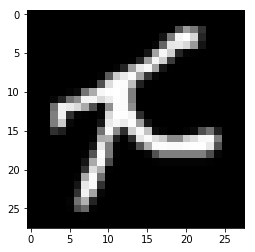

In [15]:
train_images = train_images.reshape([-1,28,28])
print(train_images.shape)
plt.imshow(train_images[7,:,:], cmap="gray")
plt.show()

In [16]:
np.save("letter_data.npy", train_images[np.random.randint(0,124800, size=10000),:,:])